### Import data from Kaggle (Kaggle API)

[**`medium-articles`** data from Kaggle](https://www.kaggle.com/datasets/fabiochiusano/medium-articles)

```bash
kaggle datasets download -d fabiochiusano/medium-articles
unzip medium-articles.zip
```

In [1]:
from datetime import datetime
import pandas as pd



def clean_data(df):
    # Filter rows based on column: 'tags'
    df = df[df['tags'].str.contains("technology", na=False, case=False)]
    # Derive column 'derivedCol' from column: 'timestamp'
    # Transform "timestamp" as per the following examples:
    #   2020-10-10 20:17:37.132000+00:00 ==> 2020-10-10
    df.insert(5, "derivedCol", df["timestamp"].str.split(" ").str[0])
    # Change column type to datetime64[ns] for column: 'derivedCol'
    df = df.astype({'derivedCol': 'datetime64[ns]'}, copy=False)
    # Filter rows based on column: 'derivedCol'
    df = df[df['derivedCol'] > datetime.strptime('2021-04-26T20:56:17.582Z', '%Y-%m-%dT%H:%M:%S.%fZ')]
    # Drop columns: 'title', 'url' and 4 other columns
    df.drop(columns=['title', 'url', 'authors', 'timestamp', 'derivedCol', 'tags'], inplace=True)
    # Drop duplicate rows across all columns
    df.drop_duplicates(inplace=True)
    # Calculated text length from column: 'text'
    df.insert(1, 'text_len', df['text'].str.len())
    return df

# Loaded variable 'df' from URI: /workspaces/text-crafter/medium_articles.csv
df = pd.read_csv(r"/workspaces/text-crafter/medium_articles.csv")

df_clean = clean_data(df.copy())
df_clean.head()

,text,text_len
135143,⭐A Target Package is short for Target Package ...,9176
135145,‘WATCH’ ~ New Series HDTV! ~ The Good Fight Se...,11175
135146,⭐A Target Package is short for Target Package ...,9175
135152,⭐A Target Package is short for Target Package ...,9195
135153,⭐A Target Package is short for Target Package ...,9212


Save the cleaned data to a new csv file

In [3]:
df_clean.to_csv(r"/workspaces/text-crafter/resources/medium-articles-technology.csv", index=False)

### Load and explore data

In [4]:
import pandas as pd
df = pd.read_csv('./resources/medium-articles-technology.csv')
df.head()

,text,text_len
0,⭐A Target Package is short for Target Package ...,9176
1,‘WATCH’ ~ New Series HDTV! ~ The Good Fight Se...,11175
2,⭐A Target Package is short for Target Package ...,9175
3,⭐A Target Package is short for Target Package ...,9195
4,⭐A Target Package is short for Target Package ...,9212


### Visualize data

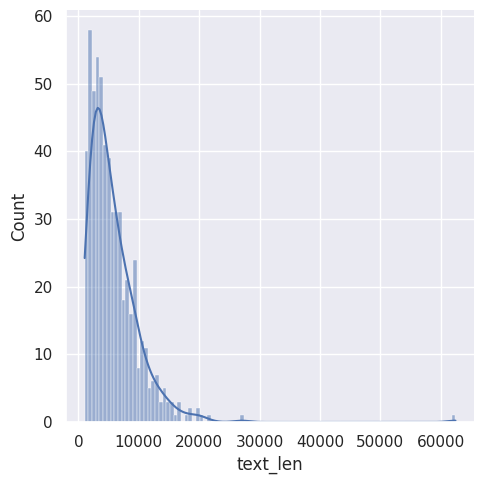

In [26]:
# Create a distribution chart with df_clean's text_len column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(df['text_len'], bins=100, kde=True)
plt.show()

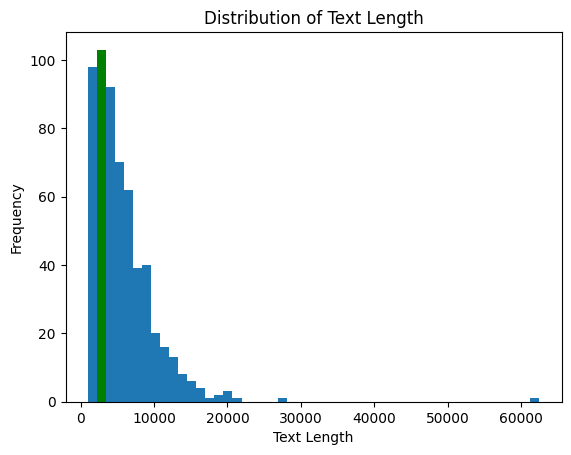

In [6]:
# Create a distribution chart with df_clean's text_len column
import matplotlib.pyplot as plt

# Get the histogram data
n, bins, patches = plt.hist(df['text_len'], bins=50)

# Find the tallest and shortest bars
tallest_patch = patches[0]
shortest_patch = patches[0]
for patch in patches:
    if patch.get_height() > tallest_patch.get_height():
        tallest_patch = patch
    if patch.get_height() < shortest_patch.get_height():
        shortest_patch = patch

# Color the tallest bar green and shortest bar red
tallest_patch.set_fc('g')
shortest_patch.set_fc('r')

plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.show()



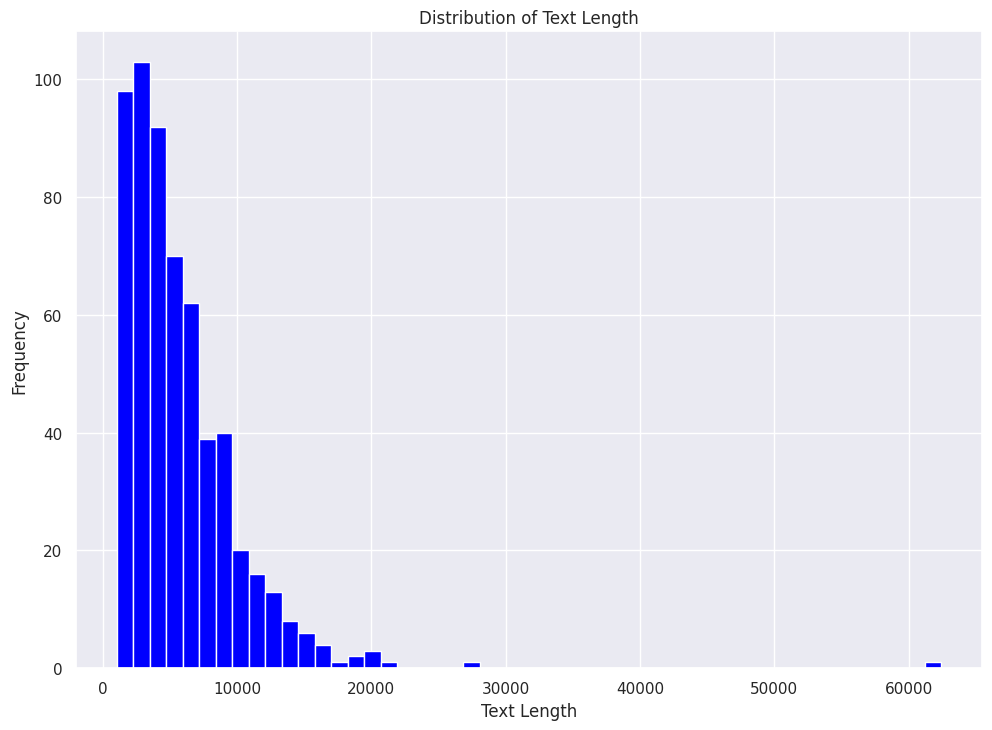

In [13]:

# Create the same plot, but color the tallest bar as green and shortest bar as red
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.hist(df['text_len'], bins=50, color='blue')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.show()


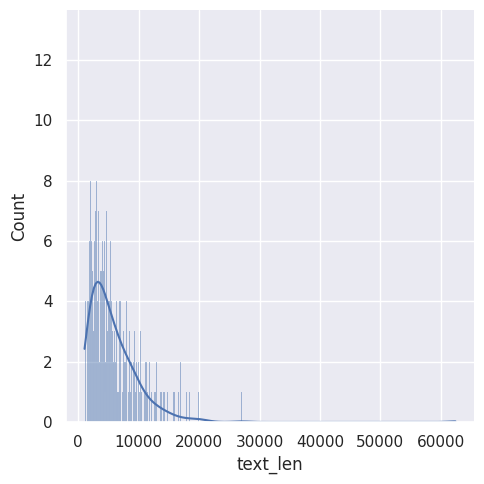

In [27]:
# Create a distribution chart with df_clean's text_len column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(df['text_len'], bins=1000, kde=True)
plt.show()


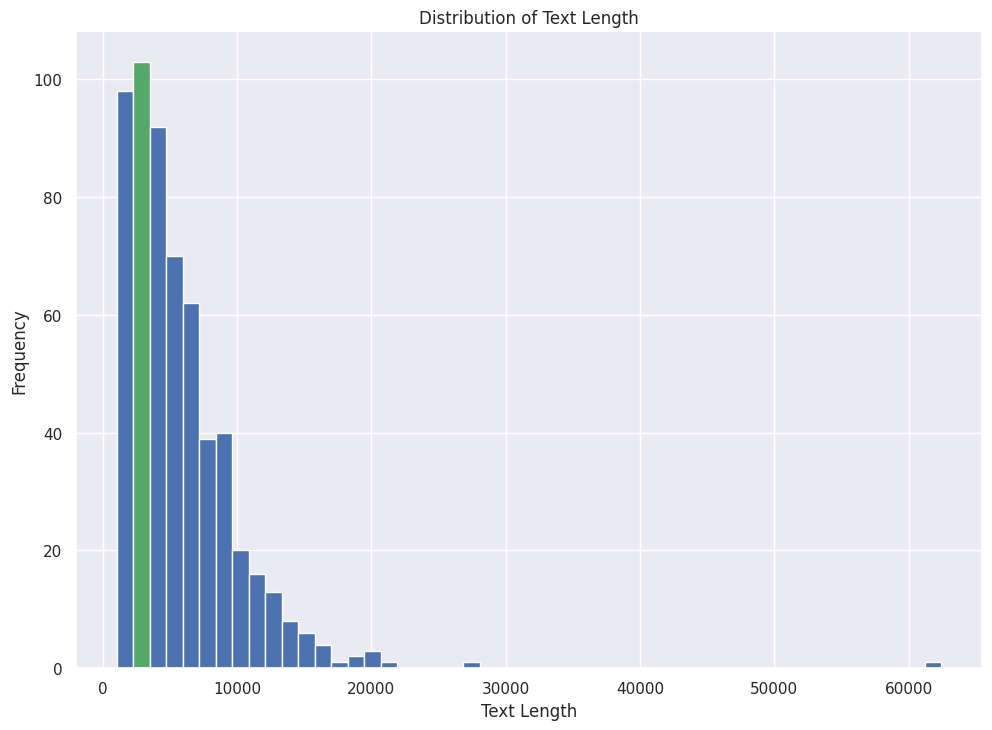

In [28]:
# Create the same plot, but color the tallest bar as green and shortest bar as red

import matplotlib.pyplot as plt

# Create histogram with 50 bins
n, bins, patches = plt.hist(df['text_len'], bins=50)

# Find the tallest and shortest bars
tallest_patch = patches[0]
shortest_patch = patches[0]
for patch in patches:
    if patch.get_height() > tallest_patch.get_height():
        tallest_patch = patch
    if patch.get_height() < shortest_patch.get_height():
        shortest_patch = patch

# Set the color of the tallest and shortest bars
tallest_patch.set_fc('g')
shortest_patch.set_fc('r')

# Set the labels and title
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')

# Show the plot
plt.show()

In [29]:
# TODO: Create visualization with df's text and text_len columns
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.scatterplot(x='text_len', y='text', data=df)
plt.xlabel('Text Length')
plt.ylabel('Text')
plt.title('Text Length vs Text')
plt.show()

/home/vscode/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vscode/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vscode/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10133 (\N{HEAVY PLUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vscode/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2972 (\N{TAMIL LETTER JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vscode/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vscode/.local/lib/pyth

KeyboardInterrupt: 

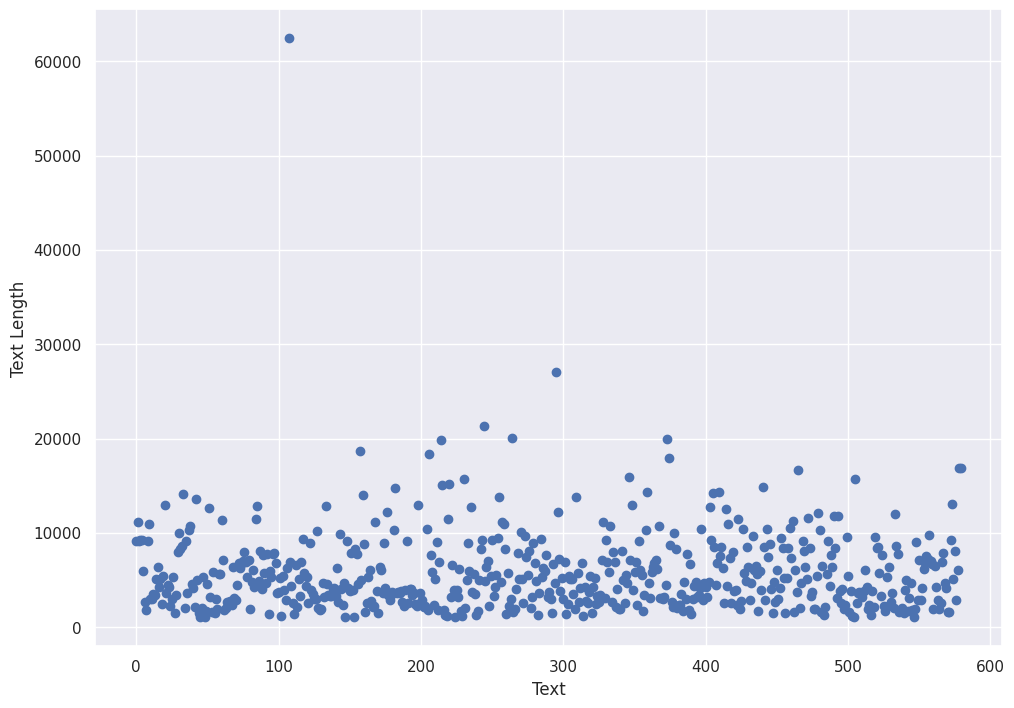

In [24]:
# Create visualization with df's text and text_len columns

import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(df.index, df['text_len'])

# Set axis labels
plt.xlabel('Text')
plt.ylabel('Text Length')

# Show plot
plt.show()


In [ ]:
# TODO: Generate word cloud using df's text column

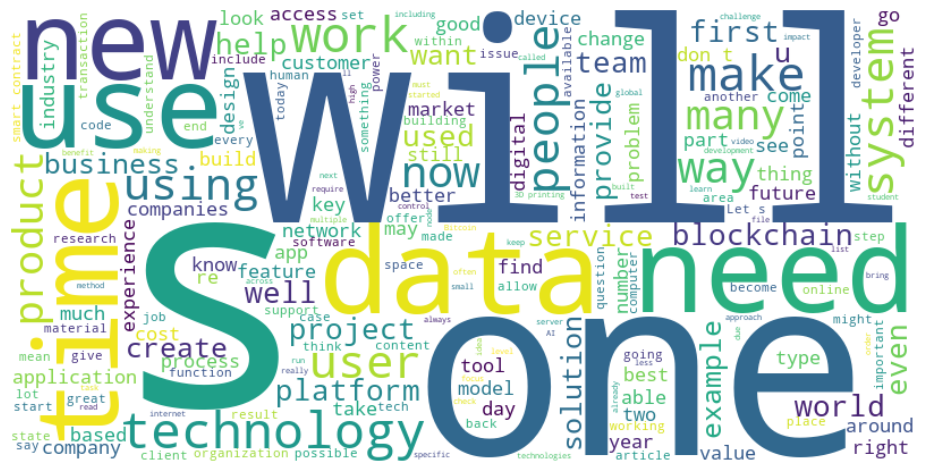

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# assuming your dataframe is named 'df' and the text column is named 'text'
text = " ".join(review for review in df.text)

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


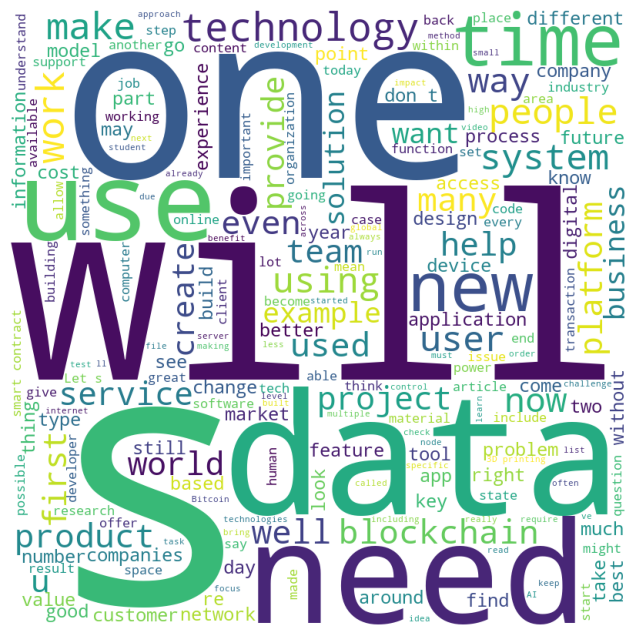

In [31]:
# Generate word cloud using df's text column
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(df['text']))

# Display the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# TODO: Create an ipywidget with a button that when pressed, outputs a random row from df's text column

In [32]:
# Create an ipywidget with a button that when pressed, outputs a random row from df's text column

import ipywidgets as widgets
from IPython.display import display
import random

# Assuming you have a pandas dataframe named df with a column named 'text'
def on_button_clicked(b):
    random_row = df.sample()
    print(random_row['text'].values[0])

button = widgets.Button(description="Get Random Row")
display(button)

button.on_click(on_button_clicked)


Button(description='Get Random Row', style=ButtonStyle())

What’s up guys! Today’s blog is on the Top Five Best Budget Sound Bars In 2021. Through extensive research I’ve put together a list of options that all meet the needs of different types of buyers. So whether it’s price performance or its particular use. Let’s get started if you’re looking not just for any budget item but the cheapest of the cheap. The Absolute Lowest price that will still deliver the goods and cover all the key points.

The best ultra cheap budget sound bar available on the market in 2021 switching from TV to cinema is now possible on the budget with the TCL TS 6110 sound bar. A slim speaker designed to enhance your home theater given on this price range. This product boasts a fairly powerful sonic output, the device is equipped with a wireless Subwoofer that is as practical as it is efficient. The woofer is a real plus because it emphasizes the base to deliver the intensity of the action as faithfully as possible.

A major plus for music lovers that’s for sure this pr

### More

Unrelated but another visualization for fun...

TODO: Write mermaid code showing the structure of the current directory

<!-- Write mermaid code showing the structure of the current directory -->
```mermaid
graph TD;
    A["c:\\"] --> B["Users"];
    A --> C["Program Files"];
    A --> D["Windows"];
    B --> E["somin"];
    B --> F["Public"];
    E --> G["Downloads"];
    E --> H["Documents"];
    G --> I["vscday"];
    H --> J["work"];
```
